In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Some Categorical Data

In [5]:
samples = 150
X1 = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X2 = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
y = np.concatenate((-1*np.ones(samples), np.ones(samples)))

In [6]:
X = np.vstack((X1, X2)).T
marks = y.tolist()
marks[marks == 0] = 'x'
marks[marks == 1] = '.'

Text(0, 0.5, 'X2')

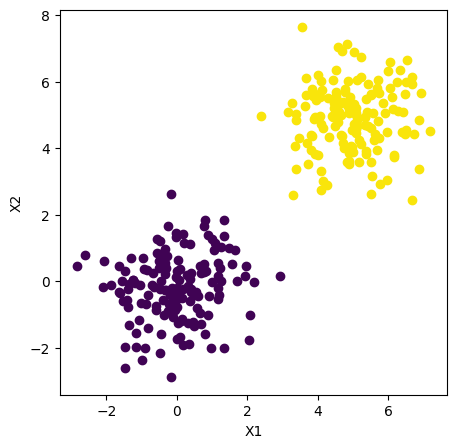

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X1[y==-1], X2[y==-1], c='#400354')
plt.scatter(X1[y==1], X2[y==1], c='#f9e50b')
plt.xlabel('X1')
plt.ylabel('X2')

# Perceptron

The perceptron is among the earliest examples of a neural network - initially acclaimed as a means of achieving Artificial Intelligence. But the perceptron is limited to linear problems. Perceptrons can be trained as a type of classifier with training data. Binary classifiers are the most basic type. This means that we are able to differentiate between two classes given a number of features. 

However, the binary perceptron is limited to classes which are **linearly separable** and a perceptron cannot distinguish which linear boundary is **better**. 

Therefore a perceptron can be thought of as learning a line through the feature space. So basically just the following equation
$$ y = wx + b $$
where the intercept is denoted by b and the slope by w. The perceptron is trained using data to establish optimal values for m and b at the point where that specific line divides the two classes.

The perceptron can be pictorially shown as the following:

IMAGE

Each feature input is given a weight keeping in mind that every single example is represented as a set of features, that is, a vector of features. Once all features are multiplied by their weights, they are all added up. Once this has been done, a bias can be added to shift the line in space. Instead of doing this, the bias can be included in the weights vector as a 1. 

After obtaining the result, it is run through an activation function. In order to determine whether a given input belongs to class (1) or class (-1) our activation function is usually a step function that returns either 1 or -1.

# Initialize Weight and Bias as zeros

In [8]:
bias = 0
weights = np.zeros(X.shape[1])

bias, weights

(0, array([0., 0.]))

# How to Optimize Weights?

Unlike logistic regression or SVM, the perceptron does not minimize a continuous loss function. It follows a discrete rule of updating weights only when there is a misclassification. It assigns a discrete penalty to misclassified points. Since it has no differentiable loss function, there is no gradient descent. 

Any learning-rate-controlled update equation can be used to learn the weights. The following equations are popularly used

$$ w[i] = w[i] +  lr * (\text{true} - \text{predicted}) * x[i] $$
$$ b = b +  lr * (\text{true} - \text{predicted}) $$

Or 

$$ w[i] = w[i] +  lr * \text{true label} * x[i] $$
$$ b = b +  lr * \text{true label} $$

where lr is the learning rate.

In [9]:
def update_weights(X, y, w, b, lr):

    for idx, x_i in enumerate(X):
        update = lr * y[idx] if y[idx] * (np.dot(x_i, w) + b) <= 0 else 0
        w = w + update * x_i
        b = b + update

    return w, b

# Run All Epochs

In [10]:
for epoch in range(10000):
    weights, bias = update_weights(X, y, weights, bias, lr=0.01)
    if epoch % 1000 == 0:
        print(f'Iteration {epoch}.')

Iteration 0.
Iteration 1000.
Iteration 2000.
Iteration 3000.
Iteration 4000.
Iteration 5000.
Iteration 6000.
Iteration 7000.
Iteration 8000.
Iteration 9000.


# Plot the Best Fit Line

In [11]:
pred = np.dot(X, weights) + bias
pred = np.where(pred >= 0, 1, -1)

Text(0, 0.5, 'X2')

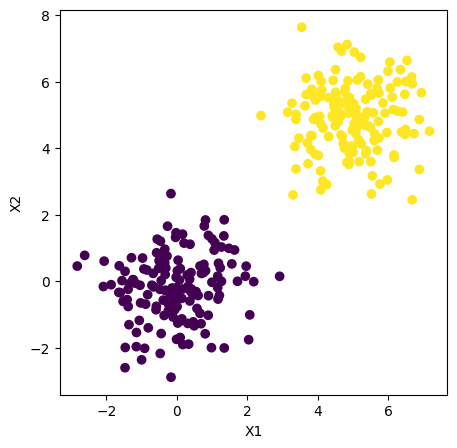

In [12]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X1, X2, c=pred)
plt.xlabel('X1')
plt.ylabel('X2')

# A Neater Approach With OOP

In [26]:
class Perceptron():
    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.bias = None
        self.weights = None

    def initialize_parameters(self, X):
        self.bias = 0
        self.weights = np.zeros(X.shape[1])

    def update_weights(self, X, y):

        for idx, x_i in enumerate(X):
            update = self.lr * y[idx] if y[idx] * (np.dot(x_i, self.weights) + self.bias) <= 0 else 0
            self.weights = self.weights + update * x_i
            self.bias = self.bias + update
        
    def fit(self, X, y):

        self.initialize_parameters(X)

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def predict(self, X):
        return np.where(np.dot(X, weights) + bias >= 0, 1, -1)
    
    def return_parameters(self):
        print(f'Weights are {self.weights}, bias is {self.bias}.')
        return self.weights, self.bias

In [31]:
percept = Perceptron(lr=0.01, epochs=1000)
percept.fit(X, y)

In [32]:
weights, bias = percept.return_parameters()

Weights are [0.05152192 0.04193147], bias is -0.16.


Text(0, 0.5, 'X2')

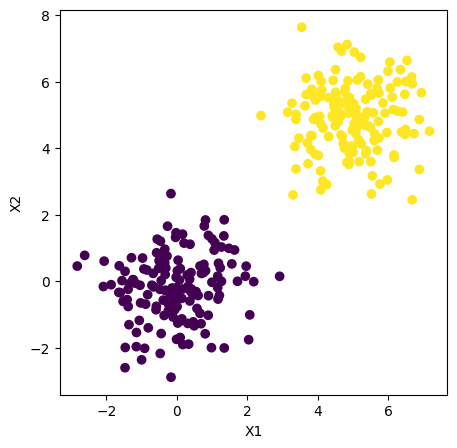

In [33]:
pred = percept.predict(X)

fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.xlabel('X1')
plt.ylabel('X2')

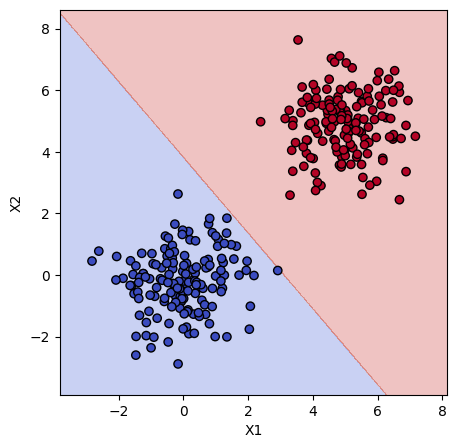

In [34]:
def plot_decision_boundary(model, X, y, resolution=0.02):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(percept, X, y)


# Make Some New (X, y) for Prediction Using Similar Scheme As Train Data

(Could have split data into test and train instead of doing this)

In [47]:
samples = 10
X1_test = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X2_test = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X_test = np.vstack((X1_test, X2_test)).T
y_test = np.concatenate((-1*np.ones(samples), np.ones(samples)))

In [48]:
predictions = percept.predict(X_test)

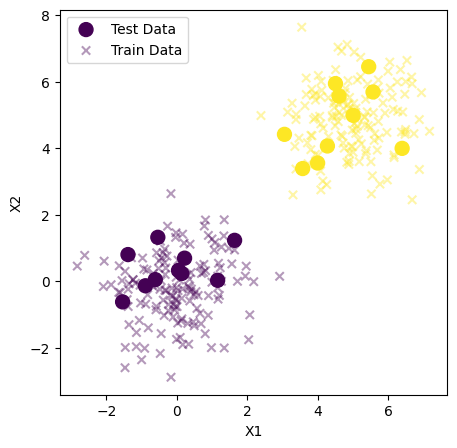

In [49]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='o', s=100, label='Test Data')
plt.scatter(X[:, 0], X[:, 1], c=y, marker='x', alpha=0.4, label='Train Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()